# Developer Documentation

Documentation for use of the ADnum, ADmath, and ADgraph packages outside of the web application.

# Table of Contents

**1. Introduction**

    1.1 Automatic Differentiation as a Solution to the Problem of Computing Derivatives
    1.2 Application of AD Techniques
    
**2. Background**

    2.1 Chain Rule
    2.2 Computational Graph Structure
    2.3 Dual Numbers
    2.4 Elementary Functions
    
**3. Package Usage**

    3.1 User Interaction
    3.2 Getting Started: Installation
    3.3 Importing AD20
    3.4 Instantiating AD20 Objects
    3.5 Newton's Method for a Scalar Valued Function
    3.6 Functions of Multiple Variables, Functions of Vector Inputs, and Vector Valued Functions
    
**4. Software Organization**

    4.1 Directory Structure
    4.2 Modules and Functionality
    4.3 Testing and Coverage
    4.4 Package Distribution
    
**5. Implementation**

    5.1 Core Data Structures
    5.2 Implemented Classes, Methods, and Attributes
    5.3 External Dependencies
    5.4 Elementary Functions
    
**6. Project Extension**

    6.1 Computational Graphs and Tables
    6.2 Graphical User Interface
    6.3 Future Work

# 1. Introduction
The AD20 package performs the forward mode of automatic differentiation of user defined functions, evaluating both the function and its derivatives to machine precision.

## 1.1 Automatic Differentiation as a Solution to the Problem of Computing Derivatives

Differentiation is a fundamental operation for computational science. Used in a variety of applications from optimization to sensitivity analysis, differentiation is most useful when two conditions are met: it must be exact (up to machine precision) and computationally efficient.

Automatic differentiation (AD) (i.e. algorithmic differentiation, computational differentiation) computes the derivative of a function, unique for its ability to handle complex combinations of functions without sacrificing the accuracy. Regardless of how complex the function may be, AD takes advantage of the fact that the function can be decomposed into a sequence of elementary arithmetic operations (addition, subtraction, multiplication, division, etc.) and elementary functions (exp, log, sin, cos, etc.). 

Through computing the derivatives of these basic elementary functions and repeatedly applying the chain rule, AD meets the two aforementioned conditions and distinguishes itself from other modes of differentiation, namely numerical differentiation and symbolic differentiation. 

**Numerical Differentiation through Finite Difference Methods:** 
This class of techniques uses the definition of a derivative,
$$\frac{df(x)}{dt} = \lim_{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}$$
to approximate the derivative by evaluating the right hand side for small $h$.  Such a technique is easy to code because it requires only defining and evaluating $f$, but it has limitations in precision due to truncation and roundoff errors, alongside the challenge of choosing an appropriately sized $h$.  While more complex finite difference schemes have been used to increase accuracy, all numerical differentiation remains only approximate with sensitivity to the choice in step size.

**Symbolic Differentiation:**
Symbolic differentiation addresses the shortcomings of approximation in numerical differentiation by computing derivatives to machine precision using expression trees, which quickly become inefficient to compute. 

Both of these options have been used in a variety of different applications to compute derivatives, but both have shortcomings that are addressed by automatic differentiation.  For this reason, for many computational applications, automatic differentiation is preferred:

- While numerical differentiation may be easy to implement and can flexibly handle any type of function, accuracy is sacrificed due to truncation and rounding errors - numerical differentiation serves more as an estimation technique based on small inputs. Unlike numerical differentiation, automatic differentiation does not rely on approximating the derivative through the choice of a small perturbation in the input, and instead computes derivatives exactly to machine precision, thus avoiding these accuracy and stability problems.


- While symbolic differentiation may ensure accuracy up to machine precision, computational efficiency is sacrified due to the nature of building complex expression trees. For complex functions, these expression trees can quickly become very large with many mathematical expressions. Unlike symbolic differentiation, automatic differentiation views functions as compositions of basic operations, remains accurate up to machine precision, and maintains computational efficiency since it does not require the buildup and evaluation of complex expression trees.
 
Thus, it is clear that automatic differentiation has advantages over other commonly used techniques for computing derivatives. These advantages make the use of AD attractive to many scientific applications. 

## 1.2 Application of AD Techniques

Through its improved accuracy and efficiency, AD has many different applications where accuracy, precision, and efficiency is crucial in computation. Some potential applications include: 

- Machine learning (ability to understand data and make models/predictions), where backpropagation is used to parameterize neural nets among other parameter optimization techniques
- Parameter optimization (ability to choose best parameter values under given conditions), where methods requiring derivatives may be used to find the optima
- Sensitivity analysis (ability to understand different factors and their impact), which requires computing partial derivatives with respect to different inputs and parameters
- Physical modeling (ability to visualize and depict data through models), where different physical properties are related through derivatives (for example, acceleration is the derivative of velocity)
- Probabilistic inference, where many sampling methods (for example, Hamiltonian Monte Carlo) are derivative based

This large range of applications motivates the development of a package that can easily be used to compute derivatives up to machine precision efficiently, precisely the problem solved by automatic differentiation.

# 3. Package Usage

## 3.1 User Interaction
Users should use `ADnum` objects to represent mathematical objects for which they would like to evaluate a value or a derivative.  By forming `ADnum` objects for the function inputs, the elementary operations and functions defined for the `ADnum` class can be composed to create any desired function, which will also be of the `ADnum` class, with associated value and derivative attributes. All operations are defined for an `ADnum` object. Users need to create an `ADnum` object for each input variable and use all the mathematical functions defined in the `ADmath` library to implement special functions.

## 3.2 Getting Started: Installing the Package
### Using PIP
The `AD20` package can be installed through PYPI, using the following command:

    pip install AD20

### Using Git
Alternatively, the files can be downloaded from the github repository using:

    git clone https://github.com/CS207-AD20/cs207-FinalProject.git

### Working with the Package in a Virtual Environment
For deployment purposes, we recommend using a virtual environment in case you may have different packages with different dependencies. A virtual environment will make deployment easier by keeping multiple environments separate. 

Download virtualenv if you do not already have it installed:

    sudo easy_install virtualenv

If you choose to install `AD20` using pip install,
   
   pip install AD20

Otherwise, in your cloned repositroy, at the top of your directory, initialize a new virtual environment called `env`, activate the virtual environment, and install all necessary packages:

    virtualenv env
    source env/bin/activate
    pip install -r requirements.txt

`requirements.txt` has been created to help you install all the packages that you may need. The last command `pip install -r requirements.txt` will install those packages for you automatically.

To deactivate the virtual environment once finished, deactivate it.

    deactivate


## 3.3 Importing AD20
In order to import and use `ADnum`, the user should import the package: 
    
    import AD20
    
The package also contains three modules which can each be imported from the main package.  For ease of use, and to follow the examples below, we suggest: 

    from AD20.ADnum import ADnum
    
    from AD20 import ADmath

    from AD20 import ADgraph

In [1]:
#commands to change to the correct directory
%pwd 
%cd ..
%cd AD20

C:\Users\Lindsey\Documents\lindsey\Harvard G3\Fall Semester\SystemsDevelopment\cs207-FinalProject
C:\Users\Lindsey\Documents\lindsey\Harvard G3\Fall Semester\SystemsDevelopment\cs207-FinalProject\AD20


In [5]:
import AD20
from AD20.ADnum import ADnum
from AD20 import ADmath
from AD20 import ADgraph

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 3.4 Instantiating AD20
After importing `AD20`, a user creates a class instance of an `ADnum` with some value to be used as input to a function. In the future, `AD20` will be able to handle scalar or vector functions with scalar or vector inputs.  Our current implementation performs automatic differentiation of scalar functions of a scalar variable.

### Steps for Instantiating Variables and Functions

#### 1. Initialize a variable (i.e. `x`) with a specific value that it will be evaluated on.
- Either initialize the value and the derivative

```python

x = ADnum(5, der = 1)

```

- Or specify the number of input variables (ins) to the function and the index (ind) of each variable

```python
x = ADnum(5, ins = 1, ind = 0)
```

#### 2. Define a function (i.e. `f`) with the variable and any other elementary functions from the ADmath module
- Either directly combine previously created ADnum objects

```python
f = ADmath.sin(x)+3*ADmath.tan(x)
```

-Or define a function and provide an ADnum object as input
```python
def g(z):
    return ADmath.sin(z)+3*ADmath.tan(z)
g(x) #an ADnum
```

####    3. `f.val` will return the value of the function evaluated at the specific value
####    4. `f.der` will return the derivative at the specific value
####    5.  Visualize f and the computational process using the tools in the `ADgraph` module
-See section 6 for more details on how to use these features.

Full code examples for scalar or vector inputs and scalar or vectored valued functions are given below.

### Scalar Function of a Scalar Variable

Here we show several examples of scalar functions of scalar variables, including an example of using our package to implement Newton's Method. 

In [3]:
# Step 1: intialize x and y to a specific value
x = ADnum(3, ins = 2, ind = 0) 
y = ADnum(4, ins = 2, ind= 1)

# Step 2: define a function f
f = 2 * y + 2*x**2

# Steps 3 and 4: Use the class attributes to access the value and 
# deriviative of the function at the value of the input x 

print(f.val) 
print(f.der) 
print(x.val)
print(x.der) 
print(y.val)
print(y.der)


26.0
[12.  2.]
3.0
[1. 0.]
4.0
[0. 1.]


In [6]:
#another example with a trignometric function, using the ADmath module

x = ADnum(np.pi, der = 1) # Step 1: initialize x, this time at pi
f = ADmath.sin(x) # Step 2: create a function, using elementary functions from the ADmath module

#Steps 3 and 4: Use the class attributes to access the value and derivative
print(f.val) # should print 1.22e-16 due to floating point error in numpy implementation (should be 0)
print(f.der) # should print -1.0
print(x.val) # should print 3.14
print(x.der) # should print 1

1.2246467991473532e-16
-1.0
3.141592653589793
1.0


Suppose we wanted to easily be able to access the value and derivative of a function at many different points.  As an alternative to the method for defining `f` in the previous two examples, we could define `f` as a python function:

In [8]:
#example to easily access value and derivative at multiple points by defining f as a function
def f(x):
    return x + ADmath.exp(x)

#get the value and derivative at 1
y = ADnum(1, der = 1)
print(f(y).val, f(y).der)

#an alternate approach to get the value and derivative at 1
print(f(ADnum(1, der = 1)).val, f(ADnum(1, der = 1)).der)

3.718281828459045 3.718281828459045
3.718281828459045 3.718281828459045


Notice that in the above example, we required the natural exponential, an elementary function, to be used from the ADmath package, so that f may take as input and return an ADnum object.

## 3.5 Newton's Method for a Scalar Valued Function
One basic application of differentiation is Newton's method for finding roots of a function.  For demonstration of using our package for such an application, we will consider the function
$$f(x) = x^2 + \sin(x)$$
which we know has a root at $x=0$.  The plot below also shows that the function has an additional root near -1.

Text(0.5, 1.0, 'Plot of f(x) Showing Two Roots')

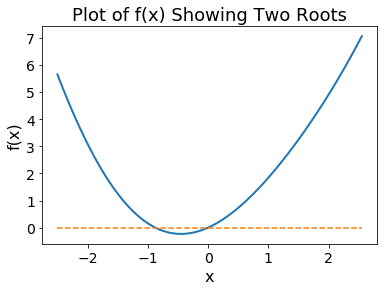

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-2.5, 2.55, 1000)
f = x**2+np.sin(x)

plt.plot(x, f, linewidth = 2)
plt.plot(x, np.zeros((1000,)), '--')
plt.xlabel('x', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize =14)
plt.title('Plot of f(x) Showing Two Roots', fontsize = 18)

In [10]:
#implementation of Newton's method using AD20, without hardcoding the derivative

#function that we wish to find the roots of
def f(x):
    return x**2+ADmath.sin(x)

#Newton's method
x = ADnum(1, der = 1) #set an initial guess for the root

for i in range(1000):
    dx = -f(x).val/f(x).der #get change using ADnum attributes
    if np.abs(dx) < .000001: #check if within some tolerance
        print('Root found at: ' + str(x.val))
        break
    x = x+dx #update the guess



Root found at: 1.2094714295298077e-11


In the above, we found the root at zero.  Using a different initialization point, we can find the other root of the function.

In [11]:
y = ADnum(-1, der = 1) #set an initial guess for the root

for i in range(1000):
    dy = -f(y).val/f(y).der #get change using ADnum attributes
    if np.abs(dy) < .000001: #check if within some tolerance
        print('Root found at: ' + str(y.val))
        break
    y = y+dy #update the guess

Root found at: -0.8767262984818225


## 3.6 Functions of Multiple Inputs, Functions of Vector Valued Inputs, and Vector Valued Functions


### Functions of Multiple Variables
In case case with a function with more than one variable, the sequence is similar except when creating ADnum objects, the user must specify the total number of input variables, and the index of each variable in the gradient (so the the constructor of the ADnum class can correctly assign the derivative of the input variable with the appropriate seed vector):
#### 1. initialize each variable to a specific value where the function should be evaluated
-In addition to the value, the user must provide the number of inputs using the keyword argument `ins` and the index of the input variable being created using the keyword argument `ind`

#### 2. return the gradient as a numpy array when `f.der` is called  
-The gradient will be a numpy array, where `f.der[ind]` gives the partial derivative of f with respect to the variable created with the specified index `ind`.

In [18]:
# scalar function, multi variables
x = ADnum(2, ins = 2, ind = 0)
y = ADnum(3, ins = 2, ind = 1)
f = 3 * x**3 + 2 * y**3
print(f.val)
print(f.der)
print(x.val)
print(x.der)
print(y.val)
print(y.der)

78.0
[36. 54.]
2.0
[1. 0.]
3.0
[0. 1.]


### Vector-valued Functions
Each component of a vector valued function is just a scalar valued function of one or more input variables.  Thus, we can easily combine the previous results to get the Jacobian of a vector valued function.  

In [19]:
x = ADnum(2, ins = 2, ind = 0)
y = ADnum(3, ins = 2, ind = 1)
F = [x**2, x+y, 4*y] #define a vector valued function

print(F[0].val)
print(F[0].der) #derivative of the first component of F with respect to x and y
print(F[1].val)
print(F[1].der)
print(F[2].val)
print(F[2].der)


4.0
[4. 0.]
5.0
[1. 1.]
12.0
[0. 4.]


### Functions of Vector Inputs
For functions which take vectors as inputs, we can also define ADnum objects but by assigning the value as a list.

In [20]:
#function of a single vector
X = ADnum([1, 2, 3], ins = 1, ind = 0)
f = 3*X + ADmath.exp(X)

print(f.val)
print(f.der)
print(X.val)
print(X.der)

[ 5.71828183 13.3890561  29.08553692]
[ 5.71828183 10.3890561  23.08553692]
[1. 2. 3.]
[1. 1. 1.]


In [21]:
#function of multiple vector inputs
X = ADnum([1, 2, 1], ins = 2, ind = 0)
Y = ADnum([4, 5, 6], ins =2, ind = 1)
G = X + Y

print(G.val)
print(G.der)
print(X.val)
print(X.der)
print(Y.val)
print(Y.der)

[5. 7. 7.]
[[1. 1. 1.]
 [1. 1. 1.]]
[1. 2. 1.]
[[1. 1. 1.]
 [0. 0. 0.]]
[4. 5. 6.]
[[0. 0. 0.]
 [1. 1. 1.]]


# 4. Software Organization
We would like to let the user use all numerical operations defined in our AD20 package. The AD20 package contains the `ADnum` module, the `ADmath` module, and the `ADgraph` module.

For either a scalar or vector input (either as a numpy array or a list), we will convert the input into an `ADnum` object, which can interact with the other modules. `ADnum` will also contain an overloaded version of basic operations, including addition, subtraction, multiplication, division, and exponentiation, so that the value and derivative are correctly updated after combining ADnum objects through each of these operations.

For special functions, we will use `ADmath` to compute the numerical values and the corresponding derivatives. In particular, `ADmath` will contain functions abs, exp, log, sin, cos, and tan.

To show a calculation graph, we use `ADgraph` to show the forward mode calculation process.

###  4.1 Directory Structure
    AD20/
        LICENSE
        README.md
        AD20/
            __init__.py
            ADnum.py
            ADmath.py
            ADgraph.py
        Tests/
            __init__.py
            test_AD20.py
    docs/
        Milestone 1.ipynb
        Milestone 2.ipynb
        Documentation.ipynb
        Final Presentation.ipynb
        figs/
    README.md
    setup.cfg
    requirements.txt
    LICENSE

###  4.2 Modules and Functionality
Our package consists of three main modules:

- **ADnum:** Contains the `ADnum` class (fully described below).  Create `ADnum` objects, which (inspired by the dual numbers) are defined by the attributes of a value and a derivative, from numbers or tuples.  Define all of the numerical operations for `ADnum` objects, so that they correctly track all derivatives.

- **ADmath:** Define elementary functions for `ADnum` objects, correctly tracking all of the derivatives.

and in future implementation,

- **ADgraph:** Set of tools for function visualization, which can be used to show a plot of the function and its derivative or the computation process in either a graph or table

These visualization tools allow us to create a Graphic User Interface as a pedagogical tool to help students better understand how the analytic results of our package can be attained by decomposing a function into a combination of elementary operations.

###  4.3 Testing and Coverage
All tests are contained in the test_AD20.py file in the tests directory (see the repo structure above).  We use pytest to perform our testing, using `TravisCI` and `Coveralls` for continuous integration and verifying code coverage respectively.  The test suite contains unit tests for all of the class methods implemented in `ADnum` and all the elementary functions implemented in `ADmath` as well as tests of the functionality of `ADgraph`.  This suite also contains several functions which are composed of several different operations and elementary functions for more advanced testing.

[![Build Status](https://travis-ci.org/CS207-AD20/cs207-FinalProject.svg?branch=master)](https://travis-ci.org/CS207-AD20/cs207-FinalProject.svg?branch=master)

[![Coverage Status](https://coveralls.io/repos/github/CS207-AD20/cs207-FinalProject/badge.svg?branch=master)](https://coveralls.io/github/CS207-AD20/cs207-FinalProject?branch=master)

###  4.4 Package Distribution
As described above, `PIP` in `PyPi` can be used to distribute our package. This will allow the user to install the package by using the command

    pip install AD20
  

# 5. Implementation
Automatic differentiation is implemented through the use of `ADnum` objects and building the functions for which we want to take derivatives from these `ADnum` objects as well as the special elementary functions defined for `ADnum` objects in the `ADmath` module.  Each of these functions is itself an `ADnum` object so has an associated value and derivative which was updated when constructing the `ADnum` object through basic operations and elementary functions.

### 5.1 Core Data Structures
`ADnum` objects can be thought of as a tuple, where the first entry is the value and the second entry is the derivative.  Each of these attributes is either a scalar or a numpy array for ease of computation.  In the case of scalar input, the derivative is also a scalar.  For vector valued input, the derivative is the gradient of the function, stored as a numpy array.

In order to build and store computational graphs in the ADgraph module, we will use a dictionary to represent the graph, where the keys are the nodes of the graph, stored as `ADnum` objects, and the values associated with each key are the children of that node, stored as lists of tuples of the form (ADnum object, string), where the string describes the function that forms the edge for each node.

### 5.2 Implemented Classes, Methods, and Attributes
The main class is the `ADnum` module, which is used to create `ADnum` objects.  It takes as input a single scalar input or a vector input (as a numpy array) and outputs an `ADnum` object.  The `ADnum` objects store the current value of the function and its derivative as attributes. 

These two attributes represent the two major functionalities desired of the class.  The `val` attribute is the ADnum object evaluated at the given value and the `der` attribute is its derivative at the given value. 

In addition to these basic attributes, ADnum objects also have a `constant` attribute, which is set to 0 or 1 depending on whether the object is a constant or variable.  This distinction is used in making computational graphs and tables, which also rely on the `graph` attribute.  This attribute is a dictionary containing key-value pairs of ADnum objects and lists of the ADnum objects that were combined to build the ADnum object (essentially using a dictionary to store a graph of nodes and edges). 

The constructor for this class, using variable keyword arguments to set the value and derivative appropriately,

```python
#ADnum.py
class ADnum:
    """ Class to create ADnum objects on which to perform differentiation.
    ATTRIBUTES
    ==========
    val : scalar for scalar valued quantities or numpy array for vector valued functions, the value of the ADnum object for a set input value
    der : scalar for sclar functions of a single variable or numpy array for functions of multiple variables the derivative 
    graph : dictionary containing the edges of the computational graph
    constant : 0 or 1 indicating whether the ADnum object is constant
    METHODS
    =======
    This class overloads the methods for basic arithmetic operations.
    EXAMPLES
    ========
    # >>> x = ADnum(2, der = 1)
    # >>> f = 2*x+3
    # >>> print(f.val)
    # 7.0
    # >>> print(f.der)
    # 2.0
    """
    def __init__(self, value, **kwargs):
        try:
            scalarinput = (isinstance(value, int) or isinstance(value, float))
            value = np.array(value)
            value = value.astype(float)
            if 'der' not in kwargs:
                try:
                    ins = kwargs['ins']
                    ind = kwargs['ind']
                    if scalarinput:
                        der = np.zeros(ins)
                        der[ind] = 1.0
                    else:
                        if ins>1:
                            der = np.zeros((ins, len(value)))
                            der[ind, :] = 1.0 #np.ones(len(value))
                        else:
                            der = np.ones(len(value))
                except:
                    raise KeyError('Must provide ins and ind if der not provided.')
            else:
                der = kwargs['der']
                der = np.array(der)
                der = der.astype(float)
                if 'ins' in kwargs:
                    ins = kwargs['ins']
                    if len(der) != ins:
                        raise ValueError('Shape of derivative does not match number of inputs.')
        except:
            raise ValueError('Value and derivative of ADnum object must be numeric.')
        self.val = value
        self.der = der
        if 'graph' not in kwargs:
            self.graph = {}
        else:
            self.graph = kwargs['graph']
        if 'constant' not in kwargs:
            self.constant = 0
        else:
            self.constant = kwargs['constant']
```

The `ADnum` class also includes methods to overload basic operations, __neg__(), __add__(), __radd__(), __mul__(), __rmul__(), __sub__(), __rsub__(), __truediv__(), __rtruediv__(), __pow__(), and __rpow__().  

Note that we have chosen not to overload the comparison operators as we must maintain that the ADnum objects are hashable to be used in the `graph` dictionary.

The result of overloading is that the adding, subtracting, multiplying, dividing, or exponentiating two `ADnum` objects returns an `ADnum` object as well as addition or multiplication by a constant.  For example, Y1, Y2, and Y3 are all recognized as `ADnum` objects:

```python
    X1= ADnum(7, der = 1)
    X2 = ADnum(15, der = 1)
    Y1 = X1 + X2
    Y2 = X1 * X2 + X1
    Y3 = 5 * X1 + X2 + 100
```

The resulting ADnum objects have both a value and derivative.  An example overloaded function is the following:


```python
#ADnum.py
    def __mul__(self,other):
        try:
            graph = merge_dicts(self.graph, other.graph)
            y = ADnum(self.val*other.val, der = self.val*other.der+self.der*other.val)
            y.graph = graph
            if self not in y.graph:
                y.graph[self] = []
            y.graph[self].append((y, 'multiply'))
            if other not in y.graph:
                y.graph[other] = []
            y.graph[other].append((y, 'multiply'))
            return y
        except AttributeError:
            other = ADnum(other*np.ones(np.shape(self.val)), der = np.zeros(np.shape(self.der)), constant = 1)
            return self*other
```

By combining simple `ADnum` objects with basic operations and simple functions, we can construct any function we like.

```python
    X = ADnum(4, der = 1)
    F = X + ADmath.sin(4 - X)
```    
Where F is now an `ADnum` object, and ADmath.sin() is a specially defined sine function which takes as input an `ADnum` object and returns an `ADnum` object, which allows us to evaluate F and its derivative,

```python
    F.val = 4
    F.der = 0
    X.val = 4
    X.der = 1
```

In addition to the sine function used in the example above, the `ADmath` module also implements the trigonometric functions: `sin()`, `cos()`, `tan()`, `csc()`, `sec()`, `cot()`, the inverse trigonometric functions: `arcsin()`, `arccos()`, `arctan()`, the hyperbolic trig functions: `sinh()`, `cosh()`, `tanh()`, and the natural exponential `exp()` and natural logarithm `log()`.  All of the functions defined in the `ADmath` module define elementary functions of `ADnum` objects, so that the output is also an `ADnum` object with the val and deriv attributes updated appropriately.  For example,

```python
#ADmath.py
def sin(X):
    try:
        y = ADnum(np.sin(X.val), der = np.cos(X.val)*X.der)
        y.graph = X.graph
        if X not in y.graph:
            y.graph[X] = []
        y.graph[X].append((y, 'sin'))
        return y
    except AttributeError:
        return np.sin(X)
```

We also implement a module `ADgraph`, for visualization of ADnum objects and the corresponding computational graphs and tables.  This class operates on ADnum objects by using the graph attribute.  The main methods are `plot_ADnum` which generates a plot of a function and its derivative (found using automatic differentiation), `draw_graph` which draws the computational graph used to compute the derivative, and `gen_table` which generates a table corresponding to the graph including the traces and values and derivatives of each trace.  The function `gen_graph` produces a `networkx` object from the dictionary stored in the `graph` attribute of the `ADnum` object, used for visualization.  We also use the method `reverse_graph` so that we have the ability to map nodes both to and from their parents.  This module also contains a number of utility functions for producing the graph (`get_labels`, `get_colors`, `get_sizes`).

### 5.3 External Dependencies
In order to implement the elementary functions, our `ADmath` relies on `numpy`’s implementation of the trigonometric functions, exponential functions, and natural logarithms for evaluation of these special functions, as demonstrated in the definition of the sine function for `ADnum` objects above.

For graph and GUI creation, we used `matplotlib`, `networkx`, `pandas`, and `tk` libraries. NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. Pandas is used for creating the computational tables.  TK is Python's de-facto standard GUI (Graphical User Interface) package. 

### 5.4 Elementary Functions
As outlined above, all elementary operations are defined for `ADnum` objects within the `ADnum` class and we have a special `ADmath` module which defines the trigonometric, exponential, and logarithmic functions to be used on `ADnum` objects, so that they both take as input and return an `ADnum` object, completing the set of defintions of all elementary operations and functions that can be composed to construct more complex functions.

## 6. Project Extension

For our project extension, we chose to create a pedagogical tool that can be used to help visualize the computational process that is used when combining different elementary operations and functions to compose more complicated functions and calculate the derivatives of these functions.   Such a tool could be useful in the classroom for teaching students how automatic differentiation works.

### 6.1 Plots and Computational Graphs and Tables
The module `ADgraph` contains visualization tools for `ADnum` objects. For every operation we create an additional ADnum object which becomes a node in our graph, representing another trace in the program, where the edge labels display the corresponding operation.  Correspondingly, we also develop the functionality to display a table showing the trace, elementary operation, value, and derivative at each step. 

Beyond the basic functionality of forward mode, this required modifying all of our methods to correctly add to the dictionary which contains the computational graph information for each operation that we have previously overloaded in addition to the functions for visualizing.

The following expamples demonstrate each of the three main visualization tools and describe how to use them.

#### Plotting a Scalar Function of a Scalar Input
The function `plot_ADnum` takes a function as input and uses our automatic differentiation package to make a plot of values and derivatives.  The function should take an `AD_num` object as input and so any special functions it contains should be defined using the `ADmath` module.  The user can optionally specify the range of inputs over which to plot the function.

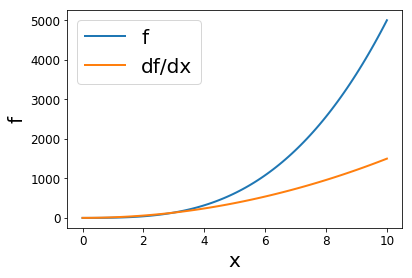

In [26]:
def f(x):
    return 5*x**3+ADmath.sin(x)

fig = ADgraph.plot_ADnum(f, xmin=0, xmax = 10)

#### Visualizing Computational Graphs
The function `draw_graph` takes an `ADnum` object as input and outputs a plot of the computational graph.  The graph is color coded to help the user better interpret the graph (magenta nodes represent the input variables, a green node represents the output, red nodes are used for intermediate traces, and blue nodes represent constants).  Each edge is labelled according to the elementary operation that connects the nodes.

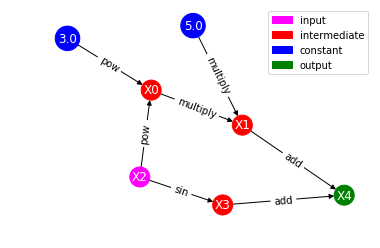

In [28]:
y = ADnum(2, der = 1)
fig2 = ADgraph.draw_graph(f(y))

The computational graph can be used for single or multiple inputs.  We can compare the following computer generated graph to the hand produced graph in section 2.2.

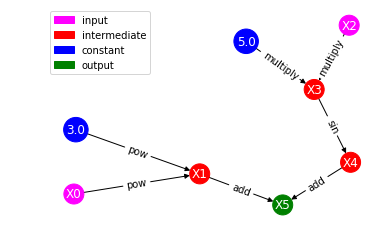

In [31]:
x = ADnum(1, ins =2, ind =0)
y = ADnum(np.pi/5, ins = 2, ind = 1)
f = x**3+ADmath.sin(5*y)

fig3 = ADgraph.draw_graph(f)

#### Generate the Corresponding Computational Table
The function `gen_table` takes an `ADnum` object as input and outputs a table of the computational traces.  Labels correspond to the graph that was generated to improve the connection between the numeric computations and visual connections.  As with the computational graph, this can be used for functions of single or multiple variables. 

In [33]:
ADgraph.gen_table(f)

,Trace,Operation,Value,Derivative
5,X0,input,1.0,"[1.0, 0.0]"
4,X1,"pow(X0 , 3.0)",1.0,"[3.0, 0.0]"
3,X2,input,0.6283185307179586,"[0.0, 1.0]"
2,X3,"multiply(X2 , 5.0)",3.141592653589793,"[0.0, 5.0]"
1,X4,sin(X3),1.2246467991473532e-16,"[-0.0, -5.0]"
0,X5,"add(X1 , X4)",1.0000000000000002,"[3.0, -5.0]"


### 6.2 Graphical User Interface

In order to develop a tool that can be deployed in the classroom, we combine the analytic functionality of our package with the visual functionality of the ADgraph.py module in a single GUI.

#### Installing
The files can be downloaded from the github repository using:

    git clone https://github.com/CS207-AD20/AD20_GUI.git
    
Note that we chose to use a separate github repository for the GUI to avoid conflicting with the tests of the main package, but a jupyter notebook version of the GUI is contained in the GUI directory of the cs207-FinalProject repo as well.
    
This repository contains the driver script for the GUI, AD20_GUI.py, built using tkinter, as well as a modified set of visualization functions, ADgraph_GUI.py, which contain the same basic functions as described in ADgraph.py but modified so that they can be displayed to the GUI.  For this reason, this implementation differs slightly from the main package where to display the plots and graphs requires slight differences in the code.

The user should first install AD20 as described above and then can run the AD20_GUI.py script to launch the GUI, from the command line:
    
    python AD20_GUI.py

#### User Interaction
In the first screen, following the instructions (accessed via the instructions button) the user uses the calculator display to define a function of a single variable, X (colored magenta to correspond to the input color in the generated graph).  This GUI includes the elementary operations and some elementary functions (more could be added in future extensions).

![firstscreen](figs/screen1.png)

If the user inputs all constant values, the first screen operates as a calculator and displays the corresponding value,

![consscreen](figs/ConstantResult.png)

Otherwise, the program converts the user input to a function, and directs the user to a second screen where the user can visualize and evaluate the function.

![secondscreen](figs/screen2.png)

By inputting different values for x, the user can evaluate the function and derivative at the input value.

![evalscreen](figs/eval.png)

By clicking the corresponding buttons, the user can then generate a plot, computational table, and computational graph.

![fullscreen](figs/fulloutput.png)

Note that the user is also able to save any of the plots and graphs in these windows.  By comparing the labels in the table to the graph and the original function, the user is able to see the connection between decomposition into elementary functions and the ability to perform automatic differentiation.

### 6.3 Future Work

Our forward mode implementation provides the necessary tools to apply automatic differentiation to many different applications.  Above, we showed that our package can easily be extended to Newton's method.  Thus, one natural extension would be to develop a package that implements different gradient based optimization techniques.

Our current implementation only uses forward mode, but for many applications (e.g., backpropagation in neural nets), backward mode is also desirable.  The ability to trace computations using our ADgraph module provides a natural possible starting point.

There are also opportunities to extend the work that has been done on graph visualization.  While the computational graph and table can be generated for single or multiple inputs of single or vector valued functions, plotting is only capable for scalar functions of scalar inputs so a surface plot method could be developed.  Furthermore, the GUI currently only allows for scalar functions of scalar variables, and the ability to extend this tool to multiple inputs would be valuable for classroom understanding.